# Kenya sign langauge project


In [1]:
# importing packages
import io
import cv2
import time
import numpy as np
import PIL.Image
import mediapipe as mp
import pandas as pd
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode

/usr/local/lib/python3.12/dist-packages/jaxlib/plugin_support.py:71: RuntimeWarning: JAX plugin jax_cuda12_plugin version 0.7.2 is installed, but it is not compatible with the installed jaxlib version 0.7.1, so it will not be used.
  warnings.warn(


In [2]:
# !pip uninstall mediapipe -y

# !pip install mediapipe==0.10.21

In [ ]:
# def collect_sign(label_name, num_samples=30):
#     js_code = '''
#     async function initCamera() {
#       // Check if it already exists to avoid duplicates
#       if (window.ksl_tracker) { window.ksl_tracker.stop(); }

#       const div = document.createElement('div');
#       div.id = 'ksl_container';
#       const video = document.createElement('video');
#       video.style.display = 'block';
#       video.width = 640;
#       video.height = 480;

#       const stream = await navigator.mediaDevices.getUserMedia({video: true});
#       document.body.appendChild(div);
#       div.appendChild(video);
#       video.srcObject = stream;
#       await video.play();

#       const canvas = document.createElement('canvas');
#       canvas.width = 640;
#       canvas.height = 480;

#       window.ksl_tracker = {
#         stream: stream,
#         div: div,
#         capture: function() {
#           canvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
#           return canvas.toDataURL('image/jpeg', 0.8);
#         },
#         stop: function() {
#           this.stream.getTracks().forEach(track => track.stop());
#           this.div.remove();
#           window.ksl_tracker = null;
#         }
#       };
#       return "READY";
#     }
#     '''
#     display(Javascript(js_code))
#     eval_js('initCamera()')
#     time.sleep(2) # Give browser time to start the hardware

#     print(f"Starting {label_name} collection...")
#     sample_count = 0

#     try:
#         while sample_count < num_samples:
#             # Safety check: is the tracker still there?
#             data_url = eval_js('window.ksl_tracker ? window.ksl_tracker.capture() : null')

#             if data_url is None:
#                 print("Camera lost. Re-initializing...")
#                 eval_js('initCamera()')
#                 time.sleep(2)
#                 continue

#             binary = b64decode(data_url.split(',')[1])
#             img = cv2.imdecode(np.frombuffer(binary, np.uint8), -1)

#             img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#             results = hands.process(img_rgb)

#             if results.multi_hand_landmarks:
#                 for hand_landmarks in results.multi_hand_landmarks:
#                     landmarks = []
#                     for lm in hand_landmarks.landmark:
#                         landmarks.extend([lm.x, lm.y, lm.z])
#                     landmarks.append(label_name)
#                     data.append(landmarks)

#                     mp_drawing.draw_landmarks(img, hand_landmarks, mp_hands.HAND_CONNECTIONS)

#                 sample_count += 1
#                 _, encoded_img = cv2.imencode('.jpg', img)
#                 display(Image(data=encoded_img, width=400), display_id='ksl_feed')
#                 print(f"Captured {sample_count}/{num_samples} for '{label_name}'", end='\r')

#             time.sleep(0.1)

#     except Exception as e:
#         print(f"\n Error: {e}")
#     finally:
#         try:
#             eval_js('if(window.ksl_tracker) window.ksl_tracker.stop()')
#         except:
#             pass
#         print(f"\n Finished {label_name}. Total data rows: {len(data)}")

# collect_sign('A',  num_samples=30)

In [12]:
data = []


<IPython.core.display.Javascript object>

 Starting A collection...


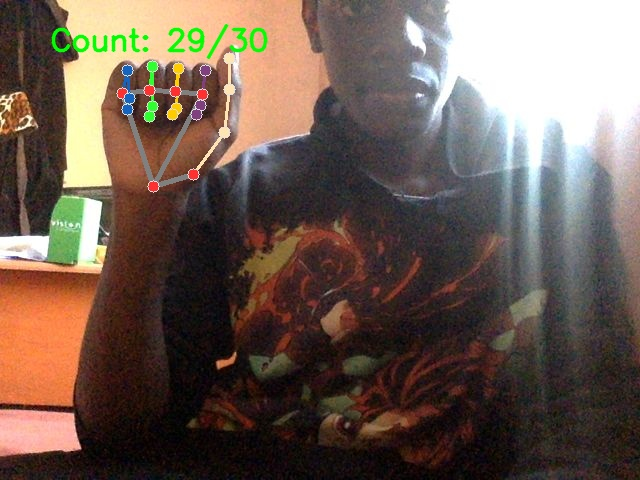


 Finished A. Total dataset size now: 31 rows.


In [13]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(
    static_image_mode=False,
    max_num_hands=2,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
)


def collect_sign(label_name, num_samples=30):
    js_code = '''
    async function initCamera() {
      if (window.ksl_tracker) { window.ksl_tracker.stop(); }
      const div = document.createElement('div');
      const video = document.createElement('video');
      video.style.display = 'block';
      video.width = 640; video.height = 480;
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();
      const canvas = document.createElement('canvas');
      canvas.width = 640; canvas.height = 480;
      window.ksl_tracker = {
        stream: stream, div: div,
        capture: function() {
          canvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          return canvas.toDataURL('image/jpeg', 0.8);
        },
        stop: function() {
          this.stream.getTracks().forEach(track => track.stop());
          this.div.remove();
          window.ksl_tracker = null;
        }
      };
      return "READY";
    }
    '''
    display(Javascript(js_code))
    eval_js('initCamera()')
    time.sleep(2)

    print(f" Starting {label_name} collection...")
    sample_count = 0

    try:
        while sample_count < num_samples:
            data_url = eval_js('window.ksl_tracker ? window.ksl_tracker.capture() : null')
            if data_url is None:
                break

            binary = b64decode(data_url.split(',')[1])
            img = cv2.imdecode(np.frombuffer(binary, np.uint8), -1)
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            results = hands.process(img_rgb)

            cv2.putText(img, f"Count: {sample_count}/{num_samples}", (50, 50),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

            if results.multi_hand_landmarks:
                for hand_landmarks in results.multi_hand_landmarks:
                    landmarks = []
                    for lm in hand_landmarks.landmark:
                        landmarks.extend([lm.x, lm.y, lm.z])
                    landmarks.append(label_name)
                    data.append(landmarks)

                    mp_drawing.draw_landmarks(
                        img,
                        hand_landmarks,
                        mp_hands.HAND_CONNECTIONS,
                        mp_drawing_styles.get_default_hand_landmarks_style(),
                        mp_drawing_styles.get_default_hand_connections_style()
                    )

                sample_count += 1

            _, encoded_img = cv2.imencode('.jpg', img)
            display(Image(data=encoded_img, width=500), display_id='ksl_feed')

            time.sleep(0.05)

    except Exception as e:
        print(f"\n Error: {e}")
    finally:
        eval_js('if(window.ksl_tracker) window.ksl_tracker.stop()')
        print(f"\n Finished {label_name}. Total dataset size now: {len(data)} rows.")

import mediapipe.python.solutions.drawing_styles as mp_drawing_styles

collect_sign('A', num_samples=30)

<IPython.core.display.Javascript object>

 Starting B collection...


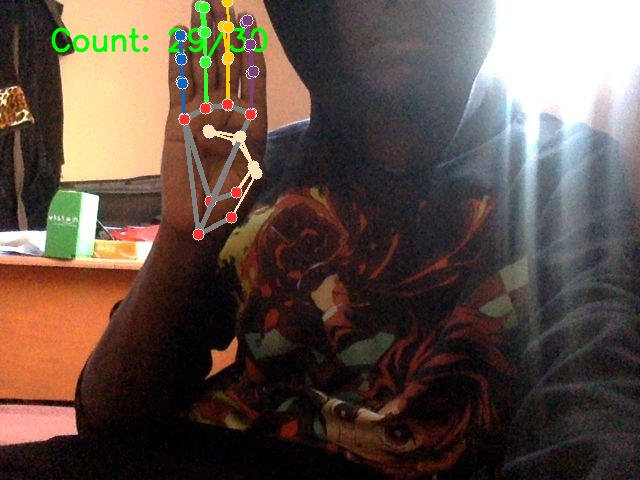


 Finished B. Total dataset size now: 67 rows.


In [14]:
# colecting sign language B
collect_sign('B', num_samples=30)

<IPython.core.display.Javascript object>

 Starting C collection...


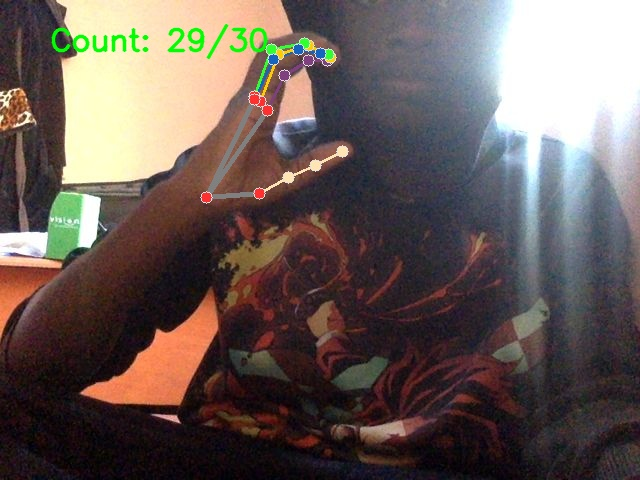


 Finished C. Total dataset size now: 97 rows.


In [15]:
# colecting sign langauge C
collect_sign('C', num_samples=30)

<IPython.core.display.Javascript object>

 Starting D collection...


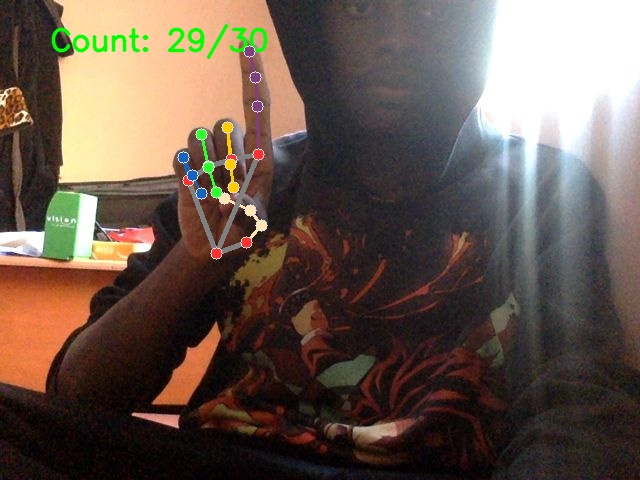


 Finished D. Total dataset size now: 129 rows.


In [16]:
# collecting sign langauge D
collect_sign('D', num_samples=30)

<IPython.core.display.Javascript object>

 Starting E collection...


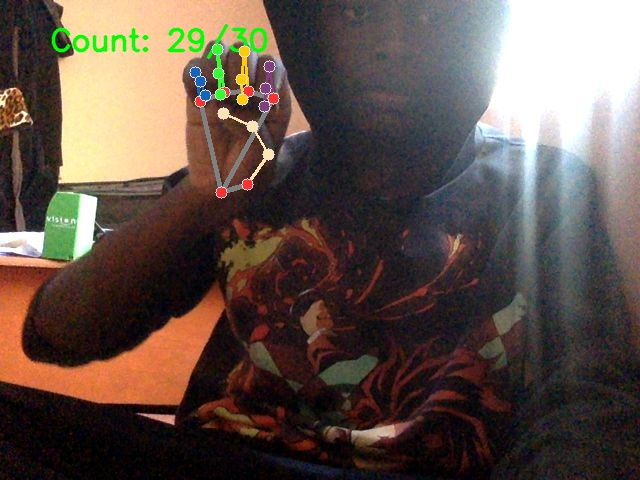


 Finished E. Total dataset size now: 161 rows.


In [17]:
# collecting sign langauge E
collect_sign('E', num_samples=30)

<IPython.core.display.Javascript object>

 Starting F collection...


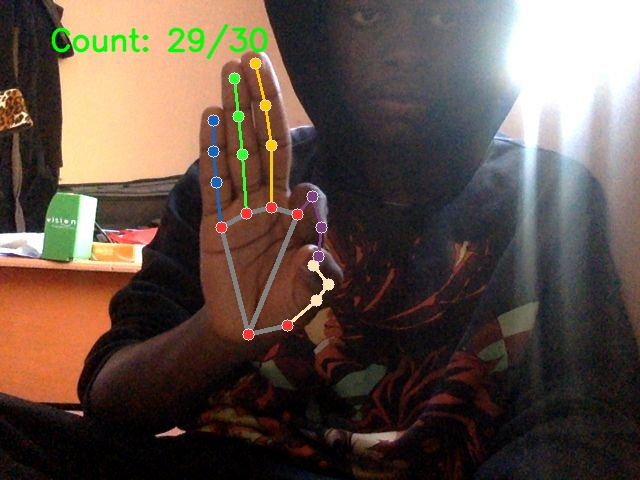


 Finished F. Total dataset size now: 192 rows.


In [18]:
# collecting sign langauge F
collect_sign('F', num_samples=30)

<IPython.core.display.Javascript object>

 Starting G collection...


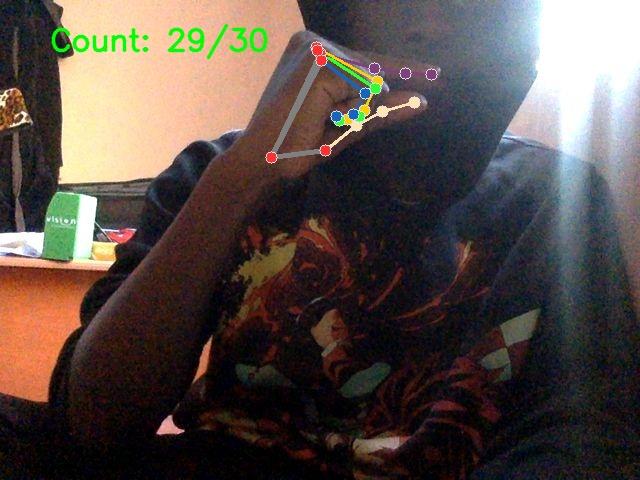


 Finished G. Total dataset size now: 222 rows.


In [19]:
# collecting sign langauge G
collect_sign('G', num_samples=30)

<IPython.core.display.Javascript object>

 Starting H collection...


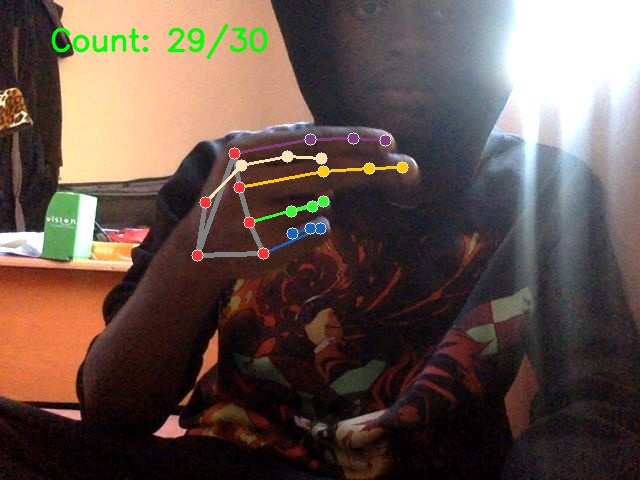


 Finished H. Total dataset size now: 252 rows.


In [20]:
# collecting sign langauge H
collect_sign('H', num_samples=30)

<IPython.core.display.Javascript object>

 Starting I collection...


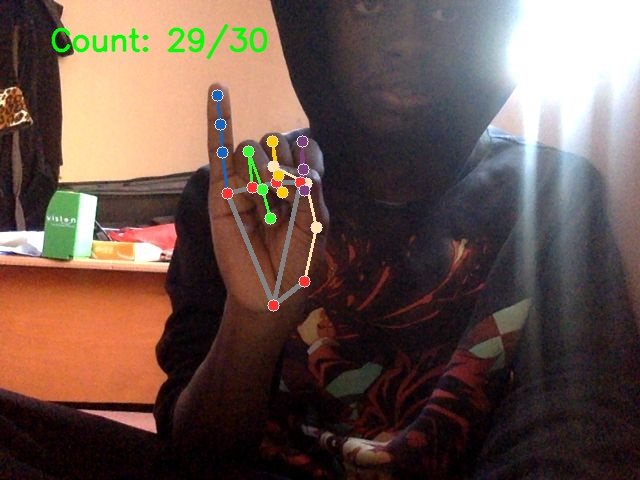


 Finished I. Total dataset size now: 283 rows.


In [21]:
# collecting sign langauge I
collect_sign('I', num_samples=30)

<IPython.core.display.Javascript object>

 Starting J collection...


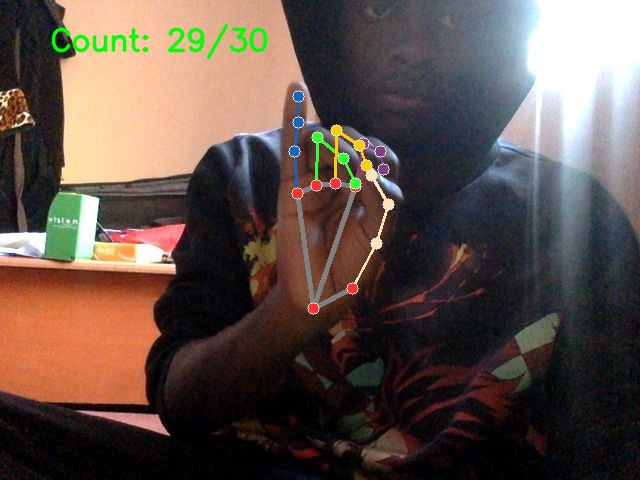


 Finished J. Total dataset size now: 316 rows.


In [22]:
# collecting sign langauge J
collect_sign('J', num_samples=30)

<IPython.core.display.Javascript object>

 Starting K collection...


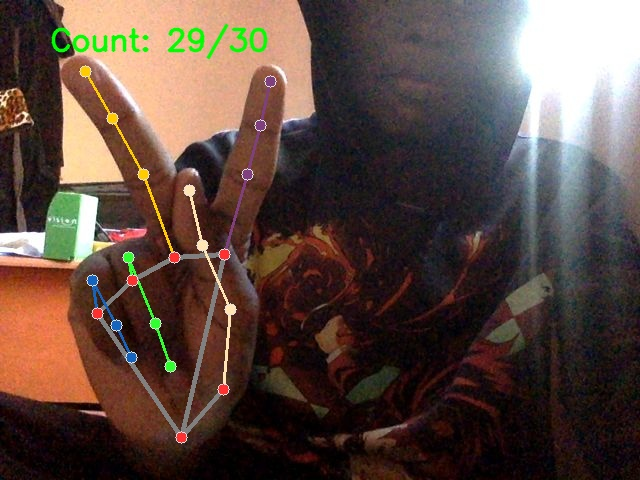


 Finished K. Total dataset size now: 346 rows.


In [23]:
# collecting sign langauge K
collect_sign('K', num_samples=30)

<IPython.core.display.Javascript object>

 Starting L collection...


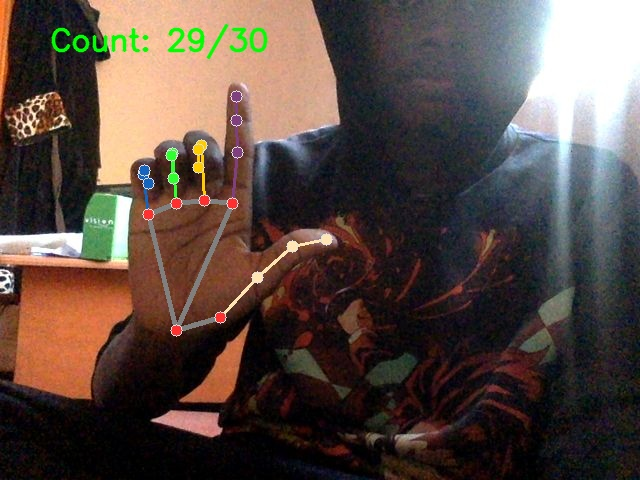


 Finished L. Total dataset size now: 376 rows.


In [24]:
# collecting sign langauge L
collect_sign('L', num_samples=30)

<IPython.core.display.Javascript object>

 Starting M collection...


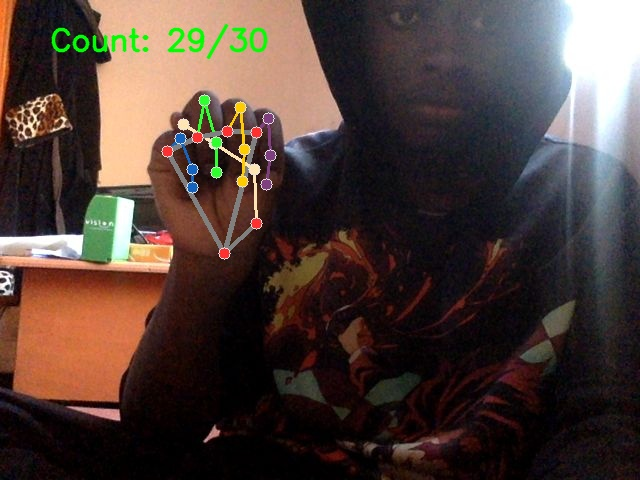


 Finished M. Total dataset size now: 410 rows.


In [25]:
# collecting sign langauge M
collect_sign('M', num_samples=30)

<IPython.core.display.Javascript object>

 Starting N collection...


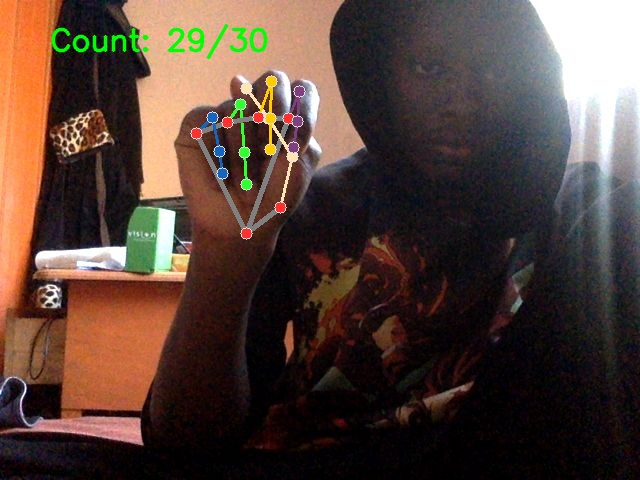


 Finished N. Total dataset size now: 441 rows.


In [26]:
# collecting sign langauge N
collect_sign('N', num_samples=30)

<IPython.core.display.Javascript object>

 Starting O collection...


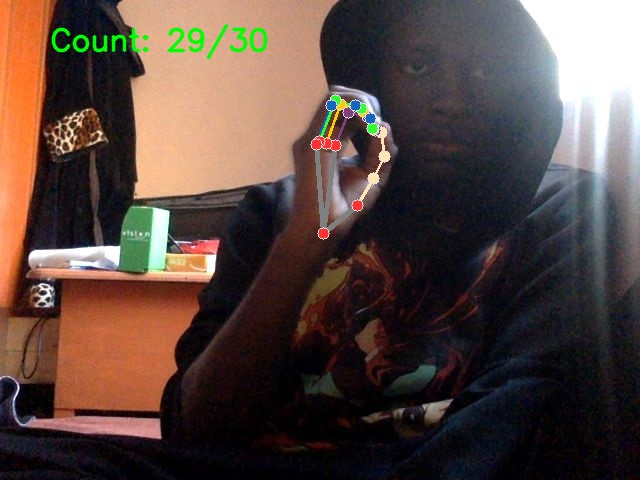


 Finished O. Total dataset size now: 472 rows.


In [27]:
# collecting sign langauge O
collect_sign('O', num_samples=30)

<IPython.core.display.Javascript object>

 Starting P collection...


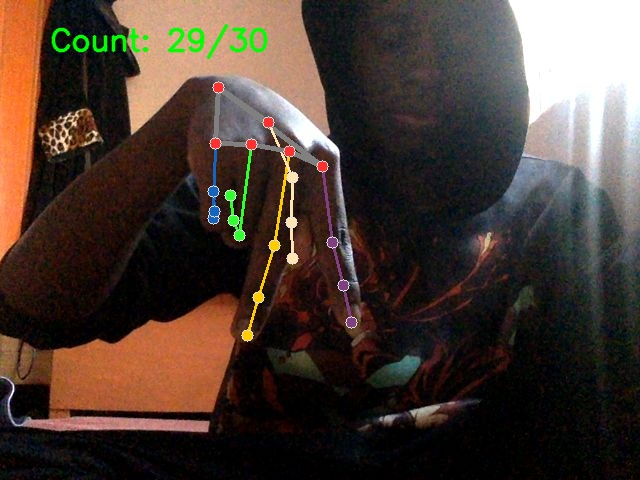


 Finished P. Total dataset size now: 503 rows.


In [28]:
# collecting sign langauge P
collect_sign('P', num_samples=30)

<IPython.core.display.Javascript object>

 Starting Q collection...


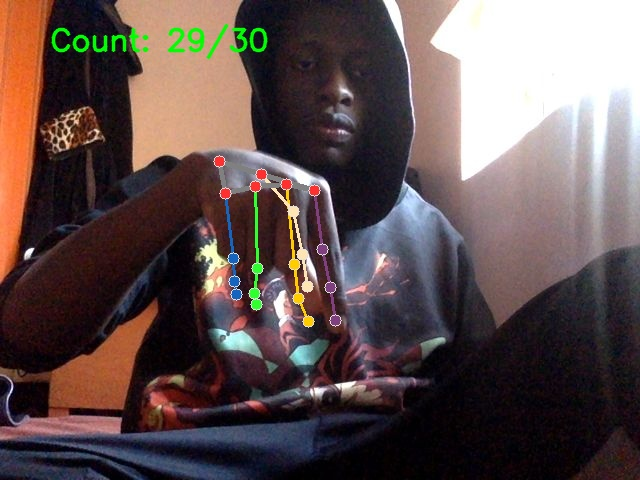


 Finished Q. Total dataset size now: 533 rows.


In [29]:
# collecting sign langauge Q
collect_sign('Q', num_samples=30)

<IPython.core.display.Javascript object>

 Starting R collection...


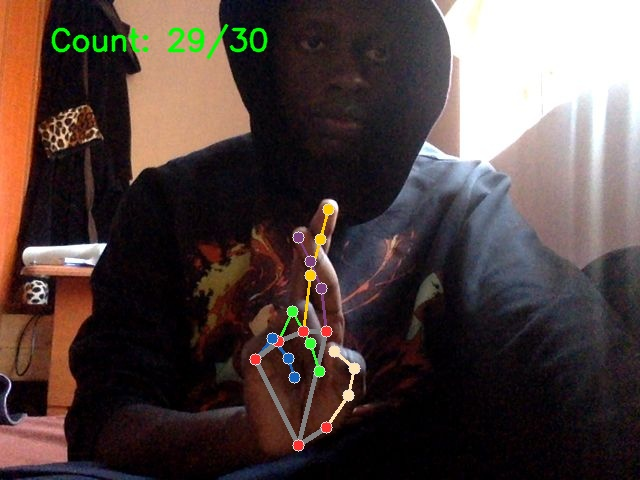


 Finished R. Total dataset size now: 565 rows.


In [30]:
# collecting sign langauge R
collect_sign('R', num_samples=30)

<IPython.core.display.Javascript object>

 Starting S collection...


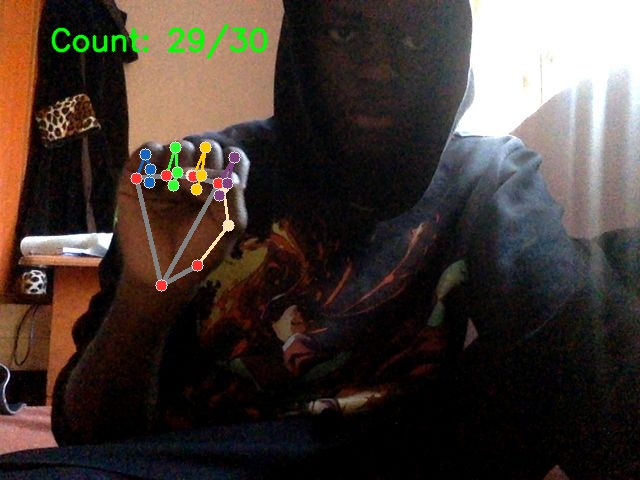


 Finished S. Total dataset size now: 595 rows.


In [31]:
# collecting sign langauge S
collect_sign('S', num_samples=30)

<IPython.core.display.Javascript object>

 Starting T collection...


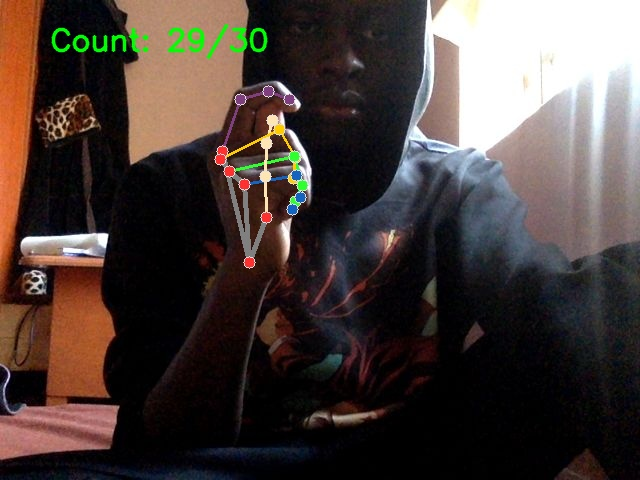


 Finished T. Total dataset size now: 633 rows.


In [32]:
# collecting sign langauge T
collect_sign('T', num_samples=30)

<IPython.core.display.Javascript object>

 Starting U collection...


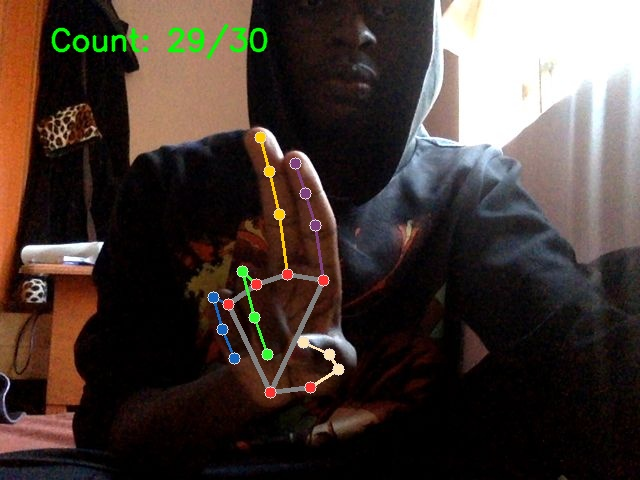


 Finished U. Total dataset size now: 674 rows.


In [33]:
# collecting sign langauge U
collect_sign('U', num_samples=30)

<IPython.core.display.Javascript object>

 Starting V collection...


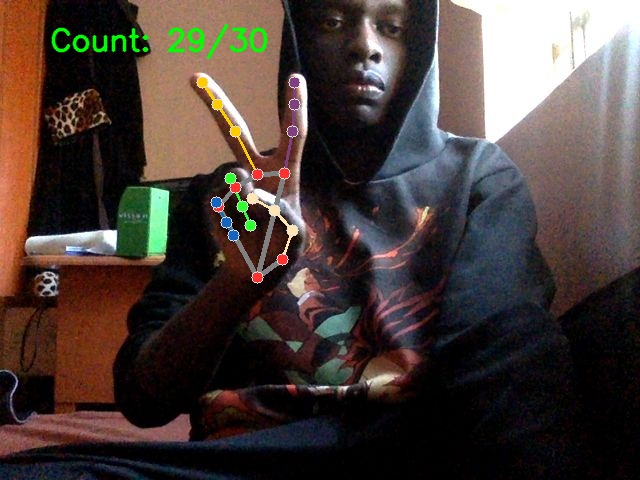


 Finished V. Total dataset size now: 706 rows.


In [34]:
# collecting sign langauge V
collect_sign('V', num_samples=30)

<IPython.core.display.Javascript object>

 Starting W collection...


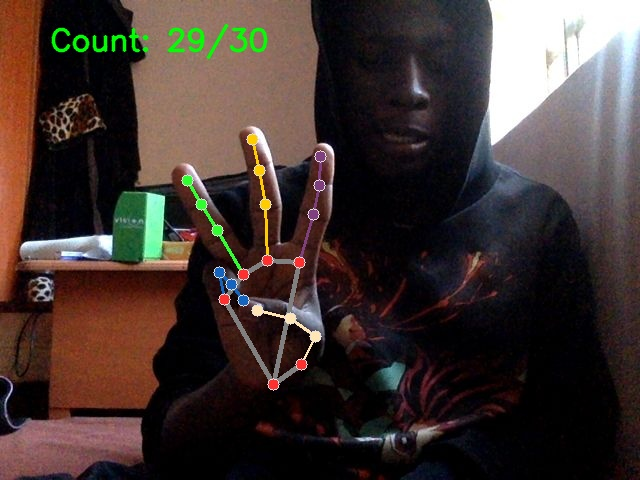


 Finished W. Total dataset size now: 737 rows.


In [35]:
# collecting sign langauge W
collect_sign('W', num_samples=30)

<IPython.core.display.Javascript object>

 Starting X collection...


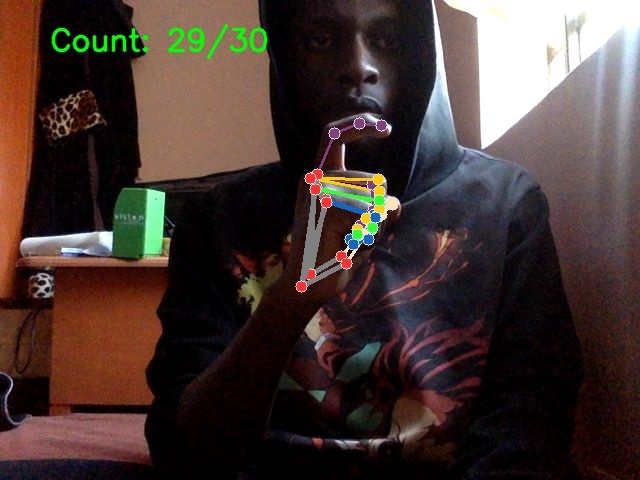


 Finished X. Total dataset size now: 769 rows.


In [36]:
# collecting sign langauge X
collect_sign('X', num_samples=30)

<IPython.core.display.Javascript object>

 Starting Y collection...


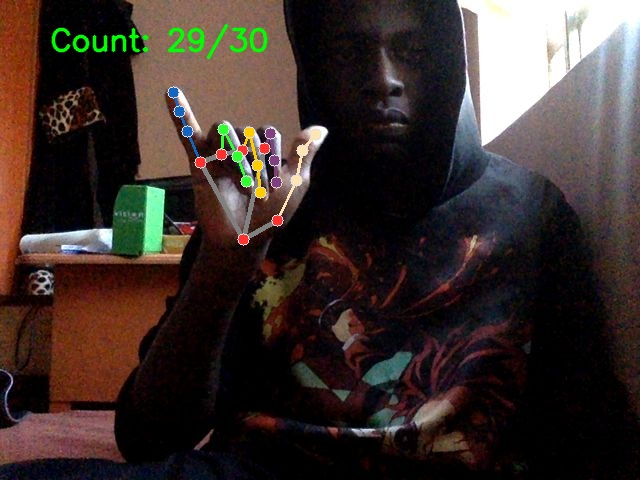


 Finished Y. Total dataset size now: 800 rows.


In [37]:
# collecting sign langauge Y
collect_sign('Y', num_samples=30)

<IPython.core.display.Javascript object>

 Starting Z collection...


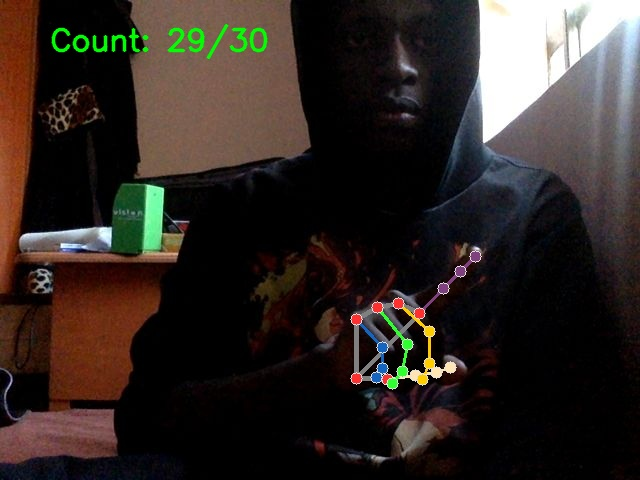


 Finished Z. Total dataset size now: 830 rows.


In [38]:
# collecting sign langauge Z
collect_sign('Z', num_samples=30)